In [1]:
# Импорт всех необходимых инструментов

import cv2
import numpy as np
import matplotlib.ticker as tic

from skimage import io, color, transform
from matplotlib import pyplot as plt

<Figure size 432x288 with 0 Axes>

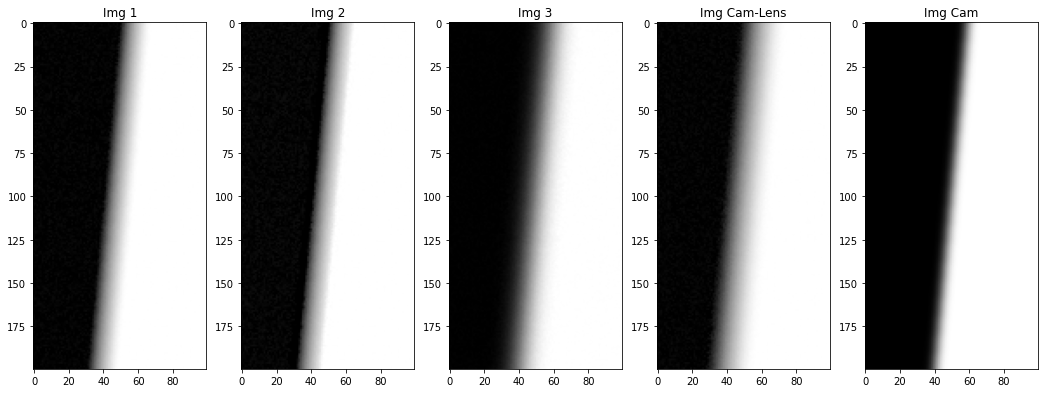

In [2]:
# Получение экземпляров исходных изображений, их вывод на экран

fig = plt.figure()

fig, ([ax1, ax2, ax3, ax4, ax5] ) = plt.subplots(
    nrows=1, ncols=5,
    figsize=(18, 14)
)

ax1.set_title('Img 1')
ax2.set_title('Img 2')
ax3.set_title('Img 3')
ax4.set_title('Img Cam-Lens')
ax5.set_title('Img Cam')

image_1 = io.imread("./images/1.png")
image_2 = io.imread("./images/2.png")
image_3 = io.imread("./images/3.png")
image_4 = io.imread("./images/cam-lens.png")
image_5 = io.imread("./images/cam.png")

ax1.imshow(image_1,  cmap="gray")
ax2.imshow(image_2,  cmap="gray")
ax3.imshow(image_3,  cmap="gray")
ax4.imshow(image_4,  cmap="gray")
ax5.imshow(image_5,  cmap="gray")

plt.show()

In [3]:
# Выравнивание изображения для получения нормали
def rotate(img): 
    img = transform.rotate(img, 5.3, preserve_range=True)
    row = img[len(img)//2] / 255
    image = np.full(img.shape, row)
    return image

In [11]:
# Функция размытия края полуплоскости

# Построение графика функции размытия полуплоскости
def draw_kf(img, add_to_title = ""):
    y = np.mean(img, axis=0)
    x = np.arange(len(y))
    fig, ax = plt.subplots()
    ax.plot(x, y, 'red', linewidth = 3)

    #Устанавливаем интервал основных делений:
    ax.xaxis.set_major_locator(tic.MultipleLocator(10))
    ax.yaxis.set_major_locator(tic.MultipleLocator(0.5))

    fig.set_figwidth(6)
    fig.set_figheight(4)
    plt.title("Краевая функция " + add_to_title, fontsize=12)
    plt.grid()
    plt.show()

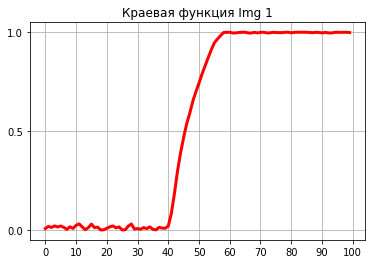

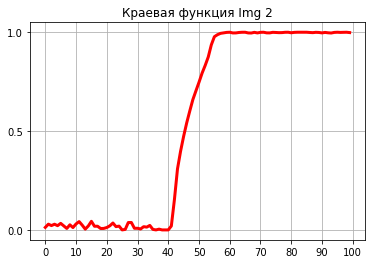

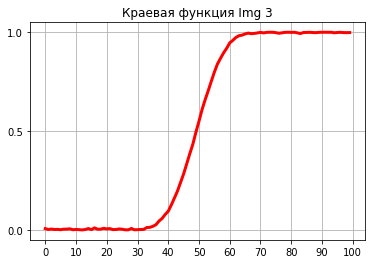

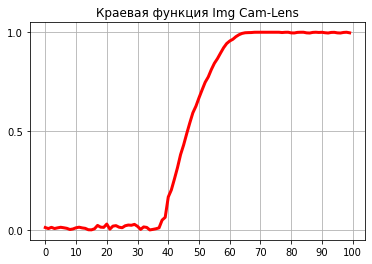

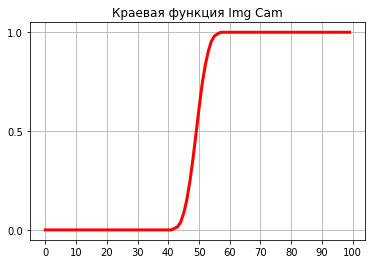

In [20]:
image_esf_1 = rotate(image_1)
image_esf_2 = rotate(image_2)
image_esf_3 = rotate(image_3)
image_esf_4 = rotate(image_4)
image_esf_5 = rotate(image_5)

draw_kf(image_esf_1, 'Img 1')
draw_kf(image_esf_2, 'Img 2')
draw_kf(image_esf_3, 'Img 3')
draw_kf(image_esf_4, 'Img Cam-Lens')
draw_kf(image_esf_5, 'Img Cam')

In [13]:
# Функция размытия линии

# Построение графика функции размытия линии
def draw_frl(img, add_to_title = ""):
    y = np.mean(img, axis=0)
    x = np.arange(len(y))
    y1 = np.gradient(y)
    y1 /= max(y1)   # Нормирование графика
    fig, ax = plt.subplots()
    ax.plot(x, y1, 'red', linewidth = 3)

    #Устанавливаем интервал основных делений:
    ax.xaxis.set_major_locator(tic.MultipleLocator(10))
    ax.yaxis.set_major_locator(tic.MultipleLocator(0.2))

    fig.set_figwidth(6)
    fig.set_figheight(4)
    plt.title("Функция размытия линии " + add_to_title, fontsize=12)
    plt.grid()
    plt.show()

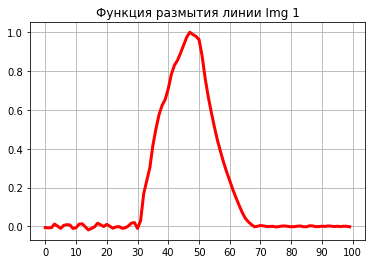

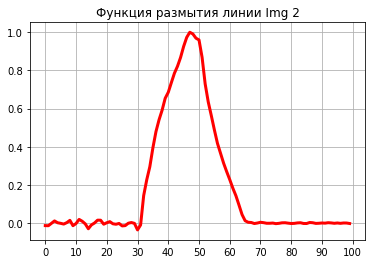

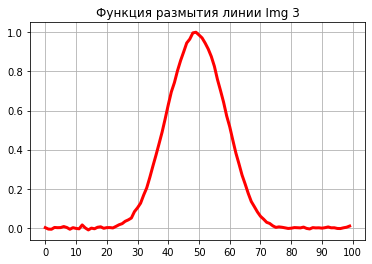

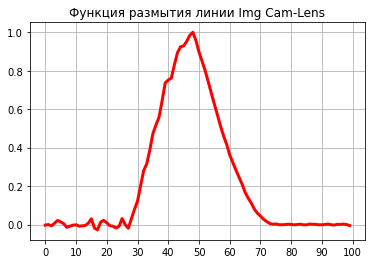

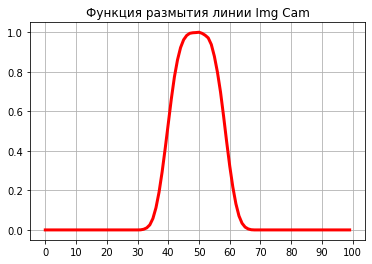

In [14]:
draw_frl(image_1, 'Img 1')
draw_frl(image_2, 'Img 2')
draw_frl(image_3, 'Img 3')
draw_frl(image_4, 'Img Cam-Lens')
draw_frl(image_5, 'Img Cam')

In [15]:
#Функция передачи модуляции

#  Построение графика функции передачи модуляции
def draw_fpm(img, add_to_title = ""):
    y = np.mean(img, axis=0)
    x = np.arange(len(y))
    y1 = np.gradient(y)
    y1 = np.fft.fft(y1)    # Дискретное фурье преобразование
    fig, ax = plt.subplots()
    ax.plot(x[:len(x)//10], np.abs(y1 / max(y1))[:len(x)//10], 'red', linewidth = 3)

    #Устанавливаем интервал основных делений:
    ax.xaxis.set_major_locator(tic.MultipleLocator(1))
    ax.yaxis.set_major_locator(tic.MultipleLocator(0.5))

    fig.set_figwidth(6)
    fig.set_figheight(4)
    plt.title("Функция передачи модуляции " + add_to_title, fontsize=12)
    plt.grid()
    plt.show()

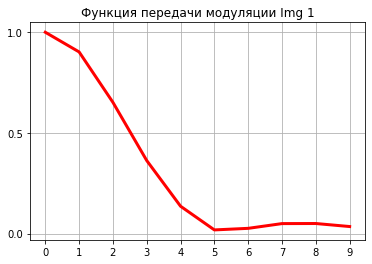

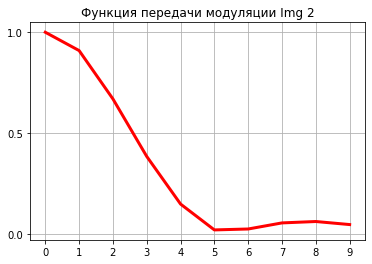

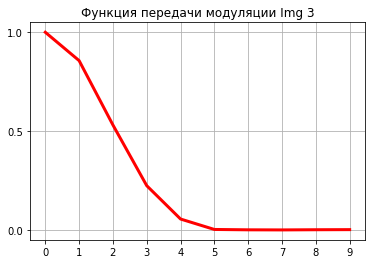

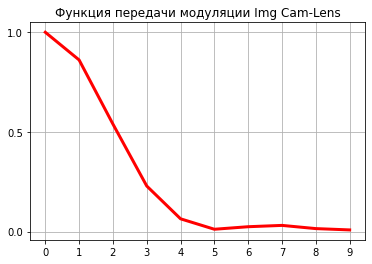

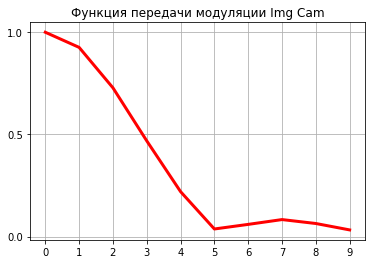

In [16]:
draw_fpm(image_1, 'Img 1')
draw_fpm(image_2, 'Img 2')
draw_fpm(image_3, 'Img 3')
draw_fpm(image_4, 'Img Cam-Lens')
draw_fpm(image_5, 'Img Cam')

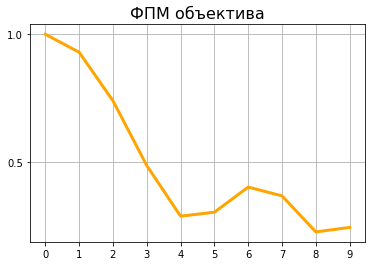

In [19]:
def divide_fpm(img1, img2, add_to_title = ""):
    y1 = np.mean(img1, axis=0)
    x1 = np.arange(len(y1))
    y11 = np.gradient(y1)
    y11 = np.fft.fft(y11)

    y2 = np.mean(img2, axis=0)
    x2 = np.arange(len(y2))
    y12 = np.gradient(y2)
    y12 = np.fft.fft(y12)

    fig, ax = plt.subplots()

    shrek1=np.abs(y11 / max(y11))[:len(x1)//10]
    shrek2=np.abs(y12 / max(y12))[:len(x2)//10]
    ax.plot(x1[:len(x1)//10], np.divide(shrek1, shrek2), 'orange', linewidth = 3)

    #Устанавливаем интервал основных делений:
    ax.xaxis.set_major_locator(tic.MultipleLocator(1))
    ax.yaxis.set_major_locator(tic.MultipleLocator(0.5))

    fig.set_figwidth(6)
    fig.set_figheight(4)
    plt.title(add_to_title, fontsize=16)
    plt.grid()
    plt.show()

divide_fpm(image_4, image_5, "ФПМ объектива")